# Esercitazione 9

**27 Aprile 2023**

*Gradiente e gradiente coniugato*

## Esercizio 1
Implementare una funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    r = A.dot(x)-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore>= tol and it< itmax:
        it=it+1
        Ap=A.dot(p)
        rTr=np.dot(r.T, r)
        alpha = rTr / np.dot(p.T, Ap)
                
        x = x + alpha*p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r 
        
    
    return x,vet_r,vec_sol,it

## Esercizio 2
Implementare una funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [9]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    r = A.dot(x)-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per trovare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A.dot(p)
        rtr=np.dot(r.T, r)
        alpha = rtr / np.dot(p.T, Ap)
        x = x + alpha *p
        vec_sol.append(x)
        r=r+alpha*Ap
        gamma=np.dot(r.T,r)/rtr
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p
   
    
    return x,vet_r,vec_sol,it

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [10]:
def creaPoisson(n):
    #costruire una matrice di Poisson
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,-3)+np.diag(f,3)
    return A

In [11]:
n=1000
A=creaPoisson(n)
print("Condizionameto di A", np.linalg.cond(A))
b=np.sum(A,axis=1).reshape(n,1)
toll=1e-8
it_max=10000
n=A.shape[0]
x0=np.zeros_like(b)
 

Condizionameto di A 81429.27286818028


In [12]:
x_gr,vet_r_gr,vec_sol_gr,itG=steepestdescent(A,b,x0,it_max,toll)
print("Iterazioni Gradiente ",itG)

Iterazioni Gradiente  10000


In [13]:
x_cg,vet_r_cg,vec_sol_cg,itCG=conjugate_gradient(A,b,x0,it_max,toll)
print("Iterazioni Gradiente Coniugato ",itCG)

Iterazioni Gradiente Coniugato  241


81429.27286818028


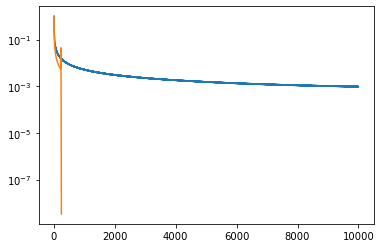

In [14]:
plt.semilogy(np.arange(itG+1),vet_r_gr,np.arange(itCG+1),vet_r_cg)
print(np.linalg.cond(A))

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

In [15]:
from scipy.linalg import hilbert

In [16]:
A2=hilbert(5)
n2=A2.shape[0]
b2=np.sum(A2,axis=1).reshape(n2,1)
print(b2.shape)
toll=1e-10
itmax=2000
x2_0=np.zeros_like(b2)

(5, 1)


In [17]:
x_gr_2,vet_r_gr_2,vec_sol_gr2,itG_2=steepestdescent(A2,b2,x2_0,itmax,toll)
x_CG_2,vet_r_CG_2,vec_sol_CG2,itCG_2=conjugate_gradient(A2,b2,x2_0,itmax,toll)

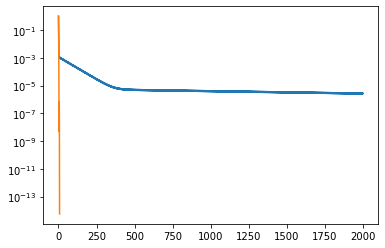

In [18]:
plt.semilogy(np.arange(itG_2+1),vet_r_gr_2,np.arange(itCG_2+1),vet_r_CG_2)

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

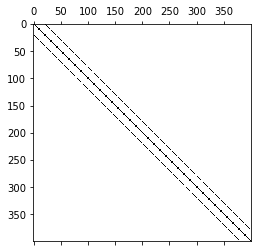

In [30]:
import creaG
n=22  #n=6-->m=16;  n=22-->m=400
G = creaG.numgrid(n)
D = creaG.delsq(G).todense().getA()
plt.spy(D)
condD=np.linalg.cond(D)
nD=D.shape[0]
bD=np.sum(D,axis=1).reshape(nD,1)
x0_D=np.zeros_like(bD)
x_gr_D,vet_r_gr_D,vec_sol_gr_D,itG_D=steepestdescent(D,bD,x0_D,itmax,toll)
x_CG_D,vet_r_CG_D,vec_sol_cg_D,itCG_D=conjugate_gradient(D,bD,x0_D,itmax,toll)



In [31]:
x_gr_D,vet_r_gr_D,vec_sol_gr_D,itG_D=steepestdescent(D,bD,x0_D,itmax,toll)
x_CG_D,vet_r_CG_D,vec_sol_gr_CG,itCG_D=conjugate_gradient(D,bD,x0_D,itmax,toll)

In [32]:
print((np.linalg.cond(D)-1)/(np.linalg.cond(D)+1))

0.9888308262251286


In [33]:
print((np.sqrt(np.linalg.cond(D))-1)/(np.sqrt(np.linalg.cond(D))+1))

0.8605695850647833


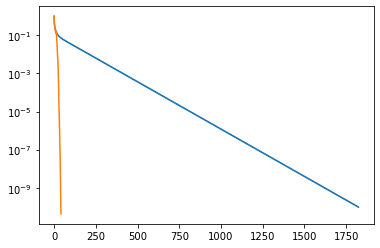

In [34]:
plt.semilogy(np.arange(itG_D+1),vet_r_gr_D,np.arange(itCG_D+1),vet_r_CG_D)